# Scope 1 
(I got an error importingmatplotlib.pyplot as plt not finding the file fontList.py3k.cache in my user/.maplotlib directory .  Tried create a blank file to see if that would work.  
Had to update system library to get around a font-manager error:  Followed https://stackoverflow.com/questions/34004063/error-on-import-matplotlib-pyplot-on-anaconda3-for-windows-10-home-64-bit-pc.

# WARNING
Looking at this and pulse view the first 1000 samples seem to have problems.  I am discarding the first 1000 may only need to be 500 to get good data.  The data otherwise seems ok.

# Bugs
- The screen changes size and is small until the end
- Needs triggers


In [1]:
%matplotlib notebook

import csv
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import sys
import time
print(sys.version)

3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


In [2]:
SIGROK_CLI_PATH = 'C:/Program Files (x86)/sigrok/sigrok-cli/sigrok-cli.exe'
DEVICE = 'hantek-6xxx'
SAMPLES = '100'

In [32]:
# All in one code block
START_BAD_SAMPLES = 1000
SAMPLES = '{}'.format(5000+START_BAD_SAMPLES)
def scope2(ax):
    # Collect data
    r = subprocess.run([SIGROK_CLI_PATH, '--driver', DEVICE, '--samples', SAMPLES, '-O', 'csv',  '--channels', 'CH1,CH2', 
                   '-o', 'test.csv', '--config', 'samplerate=1000000'], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    # Clean data
    first_data_row = int(SAMPLES)+3
    i = 0
    with open('test.csv', 'r') as csvfile:
        with open('test_clean.csv', 'w') as csv_clean:
            readCSV  = csv.reader(csvfile, delimiter=',')
            writeCSV = csv.writer(csv_clean, delimiter=',')

            for i, row in enumerate(readCSV):
                if (i == first_data_row+1) or (i> (first_data_row+START_BAD_SAMPLES)) :  # Get rid of 1st bad points
                    writeCSV.writerow(row)
    df = pd.read_csv('test_clean.csv', index_col=False, header=0);
    #graph data
    x = [x*1.0 for x in list(df.iloc[:, 0])]
    y0 = list(df.iloc[:, 1])
    y1 = list(df.iloc[:, 2])
    if ax.lines:
        ax.lines[0].set_xdata(x)
        ax.lines[0].set_ydata(y0)
        ax.lines[1].set_xdata(x)
        ax.lines[1].set_ydata(y1)
    else:
        ax.plot(x, y0, 'r')
        ax.plot(x, y1, 'b')

    #ax = df.plot(x=df.columns[0],
    #    title ="Scope", 
    #    figsize=(15, 10), 
    #    legend=True, 
    #    fontsize=12)
    #ax.yaxis.grid()
    #ax.set_xlabel(df.columns[0], fontsize=12)
    #ax.set_ylabel("V", fontsize=12)
    #ax.set_yticks(np.arange(-1, 6, 1))
    #plt.show()
    #display.clear_output(wait=True)
    #plt.show()

<IPython.core.display.Javascript object>


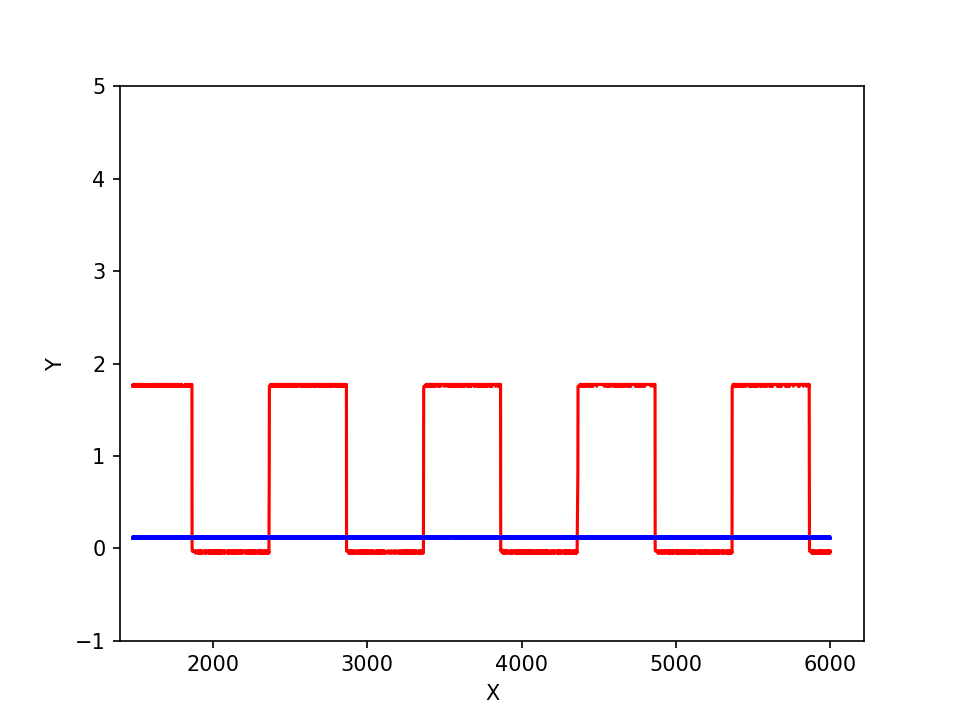

In [33]:
#plt.figure(figsize=(5, 5)) 
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim(-1,5)
for i in range(1000):
    try:
        scope2(ax)
        fig.canvas.draw()
    except KeyboardInterrupt:
        break
